Write a program that fits the events saved in the file dati.txt.

    Take care to determine the range and binning of the histogram used for the fit based on the events themselves, writing appropriate algorithms to determine the minimum and maximum of the sample and a reasonable estimate of the number of bins to use.

    Determine the initial values of the fit parameters using the techniques described in the lesson.

    Print the fit result on the screen.

    Plot the histogram with the fitted model overlaid.

    Which parameters are correlated, and which are anti-correlated with each other?



In [277]:
import iminuit, numpy as np, matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,ExtendedBinnedNLL
from scipy.stats import norm
from scipy.stats import expon

In [278]:
dati = []
with open('dati.txt', 'r') as file:
    for i in file:
        dati.append(float(i))
dati = np.array(dati)

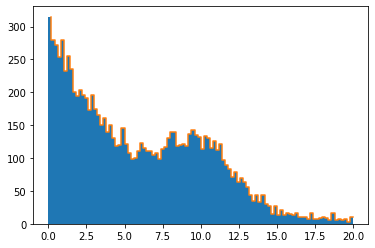

In [279]:
bin_data, bin_edges, patches = plt.hist(dati,bins=100)
plt.step(bin_edges[1:], bin_data)
plt.show()

In [280]:
def func(x,N,z,tau,u,sigma):
    return N * ( z * expon.cdf(x,0,tau) + (1-z) * norm.cdf(x,u,sigma) )

In [281]:
def fit(bin_data,bin_edges,func,N,z,tau,u,sigma):

    cost = ExtendedBinnedNLL(bin_data,bin_edges,func)
    my_minuit = Minuit(cost,N,z,tau,u,sigma)
    my_minuit.migrad()
    my_minuit.hesse()
    display(my_minuit)

In [282]:
fit(bin_data,bin_edges,func,N=10000,z=.1,tau=.1,u=7,sigma=.1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 85.74 (χ²/ndof = 0.9)      │              Nfcn = 768              │
│ EDM = 0.000128 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  10.16e3  │  0.10e3   │            │            │         │         │       │
│ 1 │ z     │   0.773   │   0.011   │            │            │         │         │       │
│ 2 │ tau   │   5.11    │   0.11    │            │            │         │         │       │
│ 3 │ u     │   9.97    │   0.08    │            │            │         │         │       │
│ 4 │ sigma │   2.08    │   0.08    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         N         z       tau         u     sigma │
├───────┼───────────────────────────────────────────────────┤
│     N │  1.06e+04 127.86e-3     1.750     0.176    -0.721 │
│     z │ 127.86e-3  0.000114   0.85e-3   0.28e-3  -0.60e-3 │
│   tau │     1.750   0.85e-3    0.0129     0.001    -0.005 │
│     u │     0.176   0.28e-3     0.001   0.00619    -0.002 │
│ sigma │    -0.721  -0.60e-3    -0.005    -0.002    0.0068 │
└───────┴───────────────────────────────────────────────────┘